In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

# Работа с временными рядами 

 Метки даты/времени ссылаются на конкретные моменты времени (например, 4 июля 2015 года в 07:00 утра).

 Временные интервалы и периоды ссылаются на отрезки времени между конкретными начальной и конечной точками (например, 2015 год). Периоды обычно представляют собой особый случай интервалов, с непересекающимися интервалами одинаковой длительности (например, 24-часовые периоды времени, составляющие сутки).

 Временная дельта (она же продолжительность) относится к отрезку времени конкретной длительности (например, 22,56 с).

In [3]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

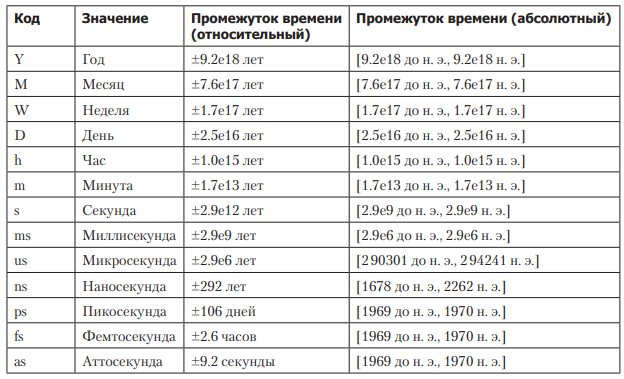

In [4]:
# вывести день недели
date.strftime("%A")

'Saturday'

In [6]:
# векторизованные операции в стиле NumPy
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [14]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [15]:
# индексации данных по меткам даты/времени
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [16]:
data['2014']

2014-07-04    0
2014-08-04    1
dtype: int64

### Структуры данных для временных рядов библиотеки Pandas 

 Для меток даты/времени библиотека Pandas предоставляет тип данных Timestamp. Соответствующая индексная конструкция — DatetimeIndex.

 Для периодов времени библиотека Pandas предоставляет тип данных Period. Соответствующая индексная конструкция —
PeriodIndex.

 Для временных дельт (продолжительностей) библиотека Pandas предоставляет
тип данных Timedelta. Соответствующая индексная конструкция — TimedeltaIndex.

In [19]:
# При передаче в функцию pd.to_datetime() отдельной даты она возвращает Timestamp, при передаче ряда дат по умолчанию возвращает DatetimeIndex
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [21]:
# to_period() преобразовывает в объект PeriodIndex, указав код для периодичности интервала
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [22]:
# Объект TimedeltaIndex
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [3]:
# Регулярные последовательности: 
# функция pd.date_range() - для меток даты/времени
# функция pd.period_range() - для периодов времени
# функция pd.timedelta_range() - для временных дельт

pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [4]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [5]:
pd.date_range('2015-07-03', periods=8, freq='H')  # по умолчанию интервал времени = 'D'

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [6]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [7]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Периодичность и смещения дат 

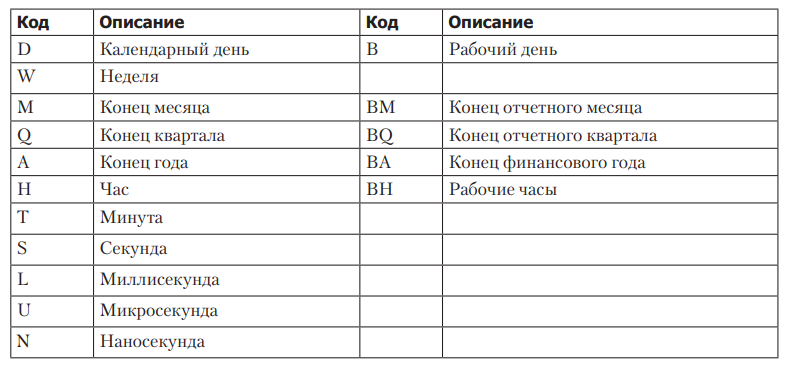

Добавление к любому из кодов суффикса S приводит к определению начала периода:
MS - начало месяца
BMS - начало отчетного месяца
QS - начало квартала
BQS - начало отчетного квартала
AS - начало года
BAS - начало финансового года

Кроме этого, можно изменить используемый для определения квартала или года месяц с помощью добавления в конец кода месяца, состоящего из трех букв:
Q-JAN
BQ-FEB
A-APR
AS-MAR

можно изменить точку разбиения для недельной периодичности, добавив состоящий из трех букв код дня недели:
W-SUN
W-MON
W-TUE
W-WED

In [9]:
# иная периодичность - код с числом
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [13]:
# pd.tseries.offsets - экземпляры смещений даты/времени
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [11]:
from pandas_datareader import data # финансовые данные из множества источников (Yahoo!Finance, Google Finance и др.)

In [19]:
# рассмотрим историю акций Газпром
gazp = data.DataReader('GAZP', start='2004-01-01', data_source='moex')
gazp.head()

,ACCINT,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,...,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDATWAP,YIELDCLOSE,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2014-06-09,NaN,145.02,5.850366e+09,NaN,NaN,TQBR,NaN,NaN,NaN,144.40,...,NaN,NaN,5.851239e+09,40347300.0,145.02,NaN,NaN,NaN,NaN,NaN
2014-06-10,NaN,143.65,5.954475e+09,NaN,NaN,TQBR,NaN,NaN,NaN,144.75,...,NaN,NaN,5.956067e+09,41460990.0,143.65,NaN,NaN,NaN,NaN,NaN
2014-06-11,NaN,145.25,5.722179e+09,NaN,NaN,TQBR,NaN,NaN,NaN,146.40,...,NaN,NaN,5.725373e+09,39418520.0,145.25,NaN,NaN,NaN,NaN,NaN
2014-06-16,NaN,144.29,1.111489e+10,NaN,NaN,TQBR,NaN,NaN,NaN,145.20,...,NaN,NaN,1.113453e+10,77165360.0,144.29,NaN,NaN,NaN,NaN,NaN
2014-06-17,NaN,145.06,6.430822e+09,NaN,NaN,TQBR,NaN,NaN,NaN,144.77,...,NaN,NaN,6.436430e+09,44370530.0,145.06,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Дата')

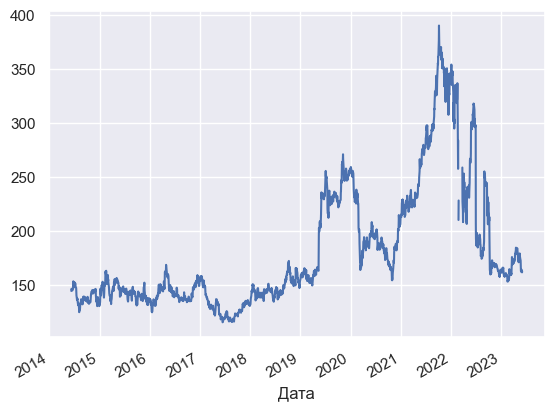

In [21]:
gazp = gazp['CLOSE']
gazp.plot()
plt.xlabel("Дата")

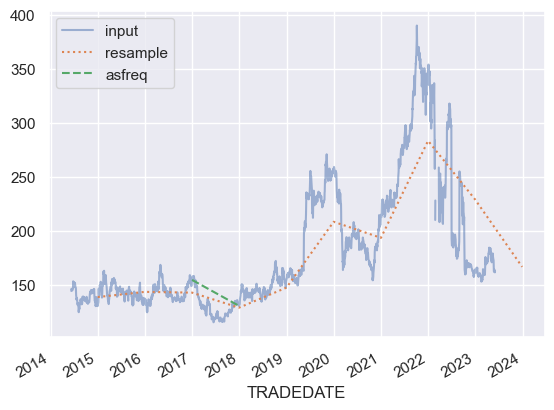

In [29]:
# Передискретизация и изменение периодичности интервалов
# resample() - агрегирование данных
# asfreq() - выборка данных

gazp.plot(alpha=0.5, style='-')  # график котировок акций
gazp.resample('BA').mean().plot(style=':')  # средняя стоимость акции на конец финансового года
gazp.asfreq('BA').plot(style='--')  # выборка данных на конец финансового года
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

### Временные сдвиги 

shift() - выполняет сдвиг данных
tshift() - сдвиг индекса

C:\Users\Данила\AppData\Local\Temp\ipykernel_7712\2383072114.py:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  gazp.tshift(900).plot(ax=ax[2])  # сдвигает на 900 дней значения индекса


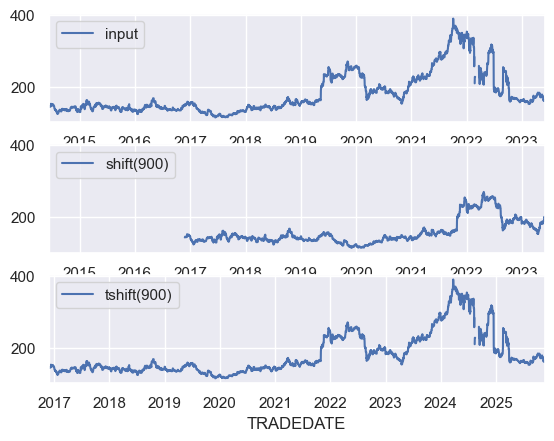

In [45]:
fig, ax = plt.subplots(3, sharey=True)
gazp = gazp.asfreq('D', method='pad')
gazp.plot(ax=ax[0])
gazp.shift(900).plot(ax=ax[1])  # сдвиг данных на 900 дней
gazp.tshift(900).plot(ax=ax[2])  # сдвигает на 900 дней значения индекса

# легенды
ax[0].legend(['input'], loc=2)
ax[1].legend(['shift(900)'], loc=2)
ax[2].legend(['tshift(900)'], loc=2)

C:\Users\Данила\AppData\Local\Temp\ipykernel_7712\1821346218.py:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (gazp.tshift(-365) / gazp - 1)


Text(0.5, 1.0, 'Прибыль на текущий день от вложений в акции Газпром')

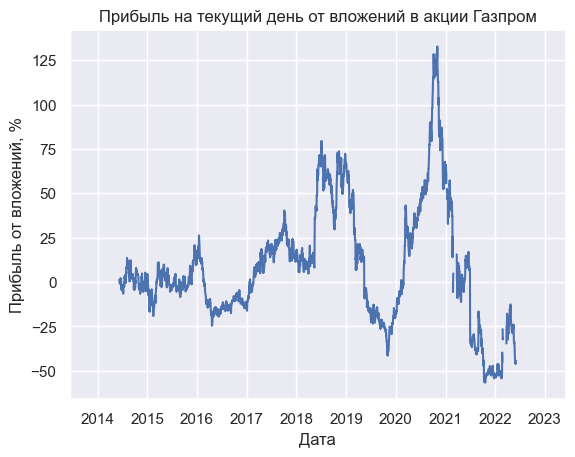

In [46]:
# вычислить прибыль за год от вложений в акции Газпрома по всему набору данных
ROI = 100 * (gazp.tshift(-365) / gazp - 1)
ROI.plot()
plt.ylabel("Прибыль от вложений, %") 
plt.xlabel("Дата")
plt.title("Прибыль на текущий день от вложений в акции Газпром")

### Скользящие окна 

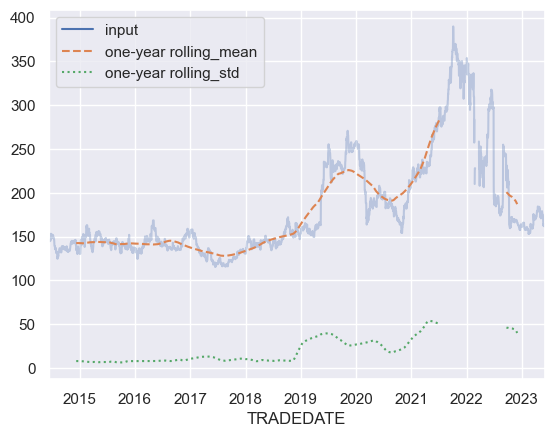

In [49]:
rolling = gazp.rolling(365, center=True)
# скользящие статистические показатели для цен на акции Газпром
data = pd.DataFrame(
    {
        'input': gazp,
        'one-year rolling_mean': rolling.mean(),
        'one-year rolling_std': rolling.std()
    }
)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)